In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from DataFormat  import DataFormat
from read_data   import read_data
from calibration import read_calibration_parameters, linear_calibration

from matplotlib.colors import LogNorm

In [11]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

In [2]:
DATA_PATH   = "./data"

LABR_A  = "labr-a"
LABR_B  = "labr-b"
CLYC    = "clyc"
PLASTIC = "plastic"

RUN_DAYS = [2, 3]

In [3]:
time_windows = [50, 100, 500, 1000, 5000, 10000, 50000, 100000] # in ns

In [6]:
tw = 50

labr_coincidence = pd.DataFrame(
    columns=['board', 'channel', 'flag', 'timestamp', 'energy', 'energy_short', 'energy_calib', 'energy_short_calib', 'psd', 'psd_calib', 'id', 'Particle', 'time_window', 'run_day', 'detector']
)

for run_day in RUN_DAYS:
    df_a = pd.read_csv(f"{DATA_PATH}/labra-coincidence-day{run_day}-{tw}ns.csv")
    df_a.loc[:, "time_window"] = tw
    df_a.loc[:, "run_day"]     = run_day
    df_a.loc[:, "detector"]    = "a"
    df_b = pd.read_csv(f"{DATA_PATH}/labrb-coincidence-day{run_day}-{tw}ns.csv")
    df_b.loc[:, "time_window"] = tw
    df_b.loc[:, "run_day"]     = run_day
    df_b.loc[:, "detector"]    = "b"
    labr_coincidence = labr_coincidence.append(df_a, ignore_index=True)
    labr_coincidence = labr_coincidence.append(df_b, ignore_index=True)

In [7]:
labr_coincidence

,board,channel,flag,timestamp,energy,energy_short,energy_calib,energy_short_calib,psd,psd_calib,id,Particle,time_window,run_day,detector
0,1,2,16384,2333175639936,376,106,1873.989873,506.901266,0.718085,0.729507,641,Neutron,50,2,a
1,1,1,16384,2333175619718,62,62,217.150205,217.150205,0.000000,0.000000,1546,Gamma,50,2,a
2,1,2,16384,78699709956874,903,282,4542.344304,1398.040506,0.687708,0.692220,21150,Neutron,50,2,a
3,1,1,16384,78699709965328,88,88,303.079736,303.079736,0.000000,0.000000,51189,Gamma,50,2,a
4,1,2,16384,126234206747779,570,169,2856.268354,825.888608,0.703509,0.710850,33998,Neutron,50,2,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1,0,16640,15030974567598592,216,216,772.998806,772.998806,0.000000,0.000000,6546585,Gamma,50,3,b
1726,1,2,16384,15173094118146365,1180,372,5944.875949,1853.736709,0.684746,0.688179,3091608,Neutron,50,3,b
1727,1,0,16384,15173094118151560,56,56,209.447080,209.447080,0.000000,0.000000,6604082,Gamma,50,3,b
1728,1,2,16384,15429538088691873,412,116,2056.268354,557.534177,0.718447,0.728861,3139773,Neutron,50,3,b


In [10]:
labr_gamma = labr_coincidence[labr_coincidence["Particle"] == "Gamma"]
labr_neutron = labr_coincidence[labr_coincidence["Particle"] == "Neutron"]

print(f"Gamma events: {len(labr_gamma)}")
print(f"Neutron events: {len(labr_neutron)}")

Gamma events: 865
Neutron events: 865


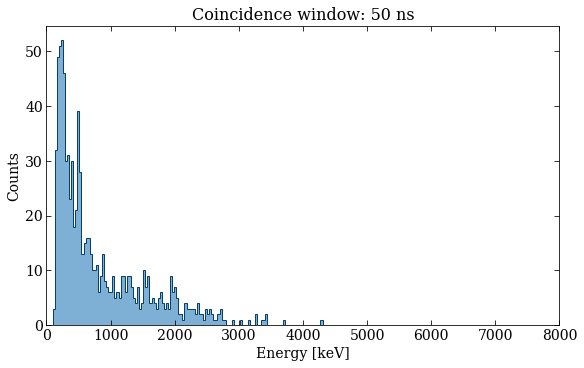

In [19]:
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)

ax.hist(
    labr_gamma["energy_calib"],
    bins      = np.linspace(0, 8000, 250), 
    histtype  = "stepfilled", 
    edgecolor = "#06416D", 
    facecolor = "#7eb0d5",
    label     = f"{tw} ns"
)

ax.set_xlim(0, 8000)

ax.set_xlabel("Energy [keV]",                     fontdict={'fontfamily':'serif', 'fontsize':14})
ax.set_ylabel("Counts",                           fontdict={'fontfamily':'serif', 'fontsize':14})
ax.set_title(f"Coincidence window: {int(tw)} ns", fontdict={'fontfamily':'serif', 'fontsize':16})


# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=14)
    
    
fig.savefig("./plots/coincidence-spectrum.png", dpi=300, facecolor="white")
plt.show()

In [23]:
# mask on the neutrons
# energy between 5500 kev and 7500 kev
# psd between 0.66 and 0.74
neutron_mask = (labr_neutron["energy_calib"] > 5500) & (labr_neutron["energy_calib"] < 7500) & (labr_neutron["psd_calib"] > 0.66) & (labr_neutron["psd_calib"] < 0.74)

labr_gamma_masked = labr_gamma[neutron_mask.values]

In [25]:
labr_gamma_masked.shape

(18, 15)

In [28]:
np.sum(neutron_mask.values)

18

In [29]:
labr_gamma.shape

(865, 15)